# Utrecht Housing - Use case (FOR HANS)

### This is a notebook for predicting retail price of house in Utrecht city, The Netherlands

Import libaries

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Import ML libs
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

print(f"Pandas version {pd.__version__}")
print(f"Numpy version {np.__version__}")
print(f"Matplotlib version {matplotlib.__version__}")
print(f"Seaborn version {sns.__version__}")
print(f"Sklearn version {sklearn.__version__}")

C:\Users\Nick\AppData\Local\Temp\ipykernel_12244\949492063.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Pandas version 2.2.0
Numpy version 1.26.4
Matplotlib version 3.8.3
Seaborn version 0.13.2
Sklearn version 1.4.1.post1


Load data from .csv (comma separated value file)

In [5]:
#data path
data_path = "utrechthousinghuge.csv"

#read csv file with pandas
df = pd.read_csv(data_path)

In [6]:
#Show first 5 values
df.head()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,100426,3528,11.1,5.0,55.5,112.50,10.5,2,2112,5113,1932,1,494000,670000,0,1
1,100871,3528,13.6,5.0,68.0,112.50,8.0,0,2355,5218,1945,1,504000,675000,0,1
2,100936,3800,16.6,6.7,111.2,150.75,44.2,2,2656,5200,1946,1,692000,869000,0,1
3,100970,3800,18.6,6.0,111.6,108.00,39.6,2,2856,5201,1946,1,521000,628000,0,1
4,101191,3800,19.6,6.0,117.6,108.00,45.6,1,2962,5266,1950,1,526000,610000,0,1


In [7]:
#Show last 5 values
df.tail()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
1995,993057,3525,12.5,7.9,98.8,142.20,19.8,2,2252,5752,1990,2,648000,765000,1,0
1996,993131,3500,16.5,7.5,123.8,135.00,33.8,2,2650,5768,1992,1,639000,728000,0,0
1997,993444,3525,12.0,6.5,78.0,146.25,19.5,2,2204,5854,2000,2,647000,733000,1,0
1998,993873,3525,13.5,7.6,102.6,136.80,26.6,1,2352,5958,2015,2,629000,694000,1,0
1999,993963,3500,18.1,8.2,148.4,184.50,58.2,2,2814,5954,2012,2,857000,888000,1,0


In [8]:
#Show 10 sample values inside the dataset
df.sample(10)

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
585,370947,3800,17.2,5.3,91.2,95.40,32.9,1,2719,5202,1939,1,455000,570000,0,1
1369,710445,3528,12.0,5.4,64.8,97.20,5.4,0,2204,5115,1930,1,441000,623000,0,1
1147,613137,3500,16.5,7.9,130.4,142.20,43.5,2,2650,5754,1993,2,673000,770000,1,0
271,223287,3525,14.1,6.9,97.3,155.25,35.2,2,2407,5804,1997,2,699000,801000,1,0
1512,771985,3800,19.1,9.9,189.1,133.65,100.0,2,2911,5466,1967,1,686000,802000,0,1
1479,753744,3500,17.1,6.5,111.2,146.25,46.2,2,2706,5905,2009,2,674000,723000,1,0
794,463279,3525,13.5,7.3,98.6,164.25,11.0,2,2353,5810,1995,2,736000,844000,1,0
1052,573843,3525,12.1,6.7,81.1,150.75,7.4,0,2209,5961,2010,1,668000,731000,1,0
490,323036,3525,11.5,10.0,115.0,135.00,10.0,2,2152,5764,1989,2,632000,752000,1,0
494,323532,3500,16.6,6.9,114.5,155.25,31.7,2,2661,5854,1999,2,713000,782000,1,0


Order dataframe by buildyear

In [9]:
df.sort_values("buildyear").head(10)

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
1482,760128,3800,16.1,7.0,112.7,157.50,28.7,1,2614,5001,1920,1,720000,914000,0,1
474,320123,3800,16.1,6.4,103.0,144.00,39.0,2,2611,5004,1920,1,658000,836000,0,1
1078,590119,3800,15.5,5.8,89.9,130.50,31.9,2,2552,5011,1921,1,594000,765000,0,1
539,350089,3528,14.1,5.0,70.5,90.00,10.5,1,2413,5015,1921,1,416000,563000,1,1
1330,690192,3800,19.5,5.4,105.3,97.20,45.9,1,2953,5015,1921,1,473000,553000,0,1
303,240068,3528,13.2,5.7,75.2,128.25,23.9,2,2319,5013,1921,2,573000,774000,1,1
1834,930065,3528,13.0,5.1,66.3,68.85,20.4,1,2300,5002,1921,1,328000,465000,1,1
22,110095,3528,14.5,6.6,95.7,148.50,29.7,1,2452,5012,1922,2,671000,884000,1,1
1702,870091,3528,14.6,5.3,77.4,71.55,13.8,1,2464,5005,1922,1,348000,478000,1,1
849,490022,3528,11.1,5.2,57.7,117.00,10.9,1,2105,5014,1922,1,514000,690000,0,1


In [10]:
df.sort_values("buildyear", ascending=True).tail(10)

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
559,353981,3500,19.2,6.5,124.8,87.75,59.8,1,2918,5968,2017,1,451000,458000,1,0
707,423944,3500,17.2,8.4,144.5,151.20,52.1,2,2718,5962,2017,1,720000,763000,1,0
820,473812,3525,10.7,6.8,72.8,91.80,6.8,0,2067,5968,2017,1,425000,469000,1,0
1206,633879,3525,13.7,7.7,105.5,138.60,28.5,2,2365,5963,2017,2,639000,703000,1,0
631,383896,3525,14.5,6.5,94.3,146.25,35.8,2,2453,5960,2017,1,660000,719000,1,0
1640,833999,3500,19.5,8.2,159.9,184.50,77.9,1,2950,5954,2017,1,866000,869000,1,0
1524,773840,3525,12.2,7.3,89.1,98.55,8.8,0,2218,5965,2017,1,465000,518000,1,0
1884,943832,3525,11.6,8.2,95.1,147.60,8.2,0,2160,5967,2018,1,666000,732000,1,0
1620,823820,3525,11.0,6.7,73.7,120.60,6.7,0,2103,5963,2018,2,541000,594000,1,0
1525,773859,3525,12.6,8.4,105.8,113.40,30.2,2,2263,5964,2018,1,538000,600000,1,0


In [11]:
df.sort_values(["buildyear","house-area"]).head(10)

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
474,320123,3800,16.1,6.4,103.0,144.00,39.0,2,2611,5004,1920,1,658000,836000,0,1
1482,760128,3800,16.1,7.0,112.7,157.50,28.7,1,2614,5001,1920,1,720000,914000,0,1
1834,930065,3528,13.0,5.1,66.3,68.85,20.4,1,2300,5002,1921,1,328000,465000,1,1
539,350089,3528,14.1,5.0,70.5,90.00,10.5,1,2413,5015,1921,1,416000,563000,1,1
1330,690192,3800,19.5,5.4,105.3,97.20,45.9,1,2953,5015,1921,1,473000,553000,0,1
303,240068,3528,13.2,5.7,75.2,128.25,23.9,2,2319,5013,1921,2,573000,774000,1,1
1078,590119,3800,15.5,5.8,89.9,130.50,31.9,2,2552,5011,1921,1,594000,765000,0,1
1702,870091,3528,14.6,5.3,77.4,71.55,13.8,1,2464,5005,1922,1,348000,478000,1,1
355,260140,3800,17.1,5.7,97.5,102.60,40.5,2,2713,5001,1922,1,488000,614000,0,1
1541,790052,3528,12.7,6.1,77.5,109.80,10.4,2,2269,5018,1922,1,501000,695000,0,1


In [12]:
df.sort_values(["house-area","buildyear"]).head(10)

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
1103,600098,3528,14.5,5.0,72.5,67.50,27.5,1,2453,5010,1925,1,328000,452000,1,1
1788,910301,3800,15.1,5.0,75.5,67.50,30.5,1,2512,5066,1929,1,330000,450000,1,1
169,180311,3800,15.6,5.0,78.0,67.50,18.0,1,2560,5058,1933,1,332000,448000,1,1
1929,970372,3800,18.5,5.0,92.5,67.50,32.5,1,2854,5054,1934,1,344000,424000,1,1
668,410467,3528,13.1,5.0,65.5,67.50,15.5,1,2308,5105,1935,1,322000,461000,1,0
611,380718,3800,15.6,5.0,78.0,67.50,18.0,1,2556,5154,1936,1,332000,448000,1,1
434,300956,3800,17.6,5.0,88.0,67.50,38.0,1,2763,5204,1940,1,340000,431000,1,0
563,360808,3528,10.1,5.0,50.5,67.50,5.5,0,2006,5215,1947,1,310000,419000,1,0
461,311017,3528,10.7,5.0,53.5,67.50,5.0,0,2066,5255,1949,1,313000,426000,1,0
1834,930065,3528,13.0,5.1,66.3,68.85,20.4,1,2300,5002,1921,1,328000,465000,1,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2000 non-null   int64  
 1   zipcode      2000 non-null   int64  
 2   lot-len      2000 non-null   float64
 3   lot-width    2000 non-null   float64
 4   lot-area     2000 non-null   float64
 5   house-area   2000 non-null   float64
 6   garden-size  2000 non-null   float64
 7   balcony      2000 non-null   int64  
 8   x-coor       2000 non-null   int64  
 9   y-coor       2000 non-null   int64  
 10  buildyear    2000 non-null   int64  
 11  bathrooms    2000 non-null   int64  
 12  taxvalue     2000 non-null   int64  
 13  retailvalue  2000 non-null   int64  
 14  energy-eff   2000 non-null   int64  
 15  monument     2000 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 250.1 KB


In [14]:
df.describe()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000
mean,550159.413500,3609.088000,14.848500,7.75520,115.236600,139.884750,35.45365,1.152500,2484.360500,5484.435000,1969.044500,1.327000,6.517150e+05,7.910245e+05,0.501500,0.510000
std,257599.198061,131.206058,2.883188,1.69576,34.370459,41.745307,23.86576,0.698203,288.399892,288.538538,26.358109,0.469235,1.829273e+05,2.109795e+05,0.500123,0.500025
min,100426.000000,3500.000000,10.000000,5.00000,50.500000,67.500000,5.00000,0.000000,2000.000000,5000.000000,1920.000000,1.000000,3.100000e+05,4.190000e+05,0.000000,0.000000
25%,330326.250000,3525.000000,12.425000,6.47500,89.100000,110.700000,13.87500,1.000000,2242.250000,5242.250000,1947.000000,1.000000,5.210000e+05,6.317500e+05,0.000000,0.000000
50%,556845.500000,3528.000000,14.850000,7.65000,109.950000,135.000000,32.00000,1.000000,2484.500000,5484.500000,1969.000000,1.000000,6.330000e+05,7.660000e+05,1.000000,1.000000
75%,763794.250000,3800.000000,17.275000,9.10000,138.325000,166.500000,52.55000,2.000000,2726.750000,5726.750000,1992.000000,2.000000,7.592500e+05,9.072500e+05,1.000000,1.000000
max,993963.000000,3800.000000,19.700000,11.00000,215.600000,247.500000,115.50000,2.000000,2969.000000,5969.000000,2018.000000,2.000000,1.162000e+06,1.428000e+06,1.000000,1.000000


### EDA Exploratory Data Analysis

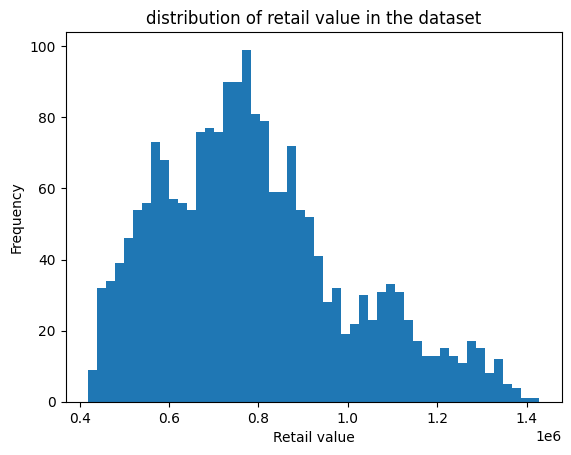

In [15]:
select_column = df["retailvalue"]

plt.hist(select_column, bins=50)

plt.xlabel('Retail value')
plt.ylabel('Frequency')
plt.title('distribution of retail value in the dataset')
plt.show()

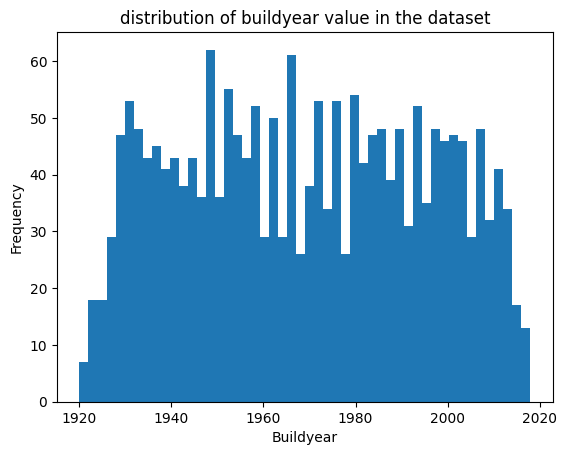

In [16]:
select_column = df["buildyear"]

plt.hist(select_column, bins=50)

plt.xlabel('Buildyear')
plt.ylabel('Frequency')
plt.title('distribution of buildyear value in the dataset')
plt.show()

In [17]:
def plot_histogram(column_name, bins):
    select_column = df[column_name]

    plt.hist(select_column, bins=bins)

    plt.xlabel(f'{column_name} value')
    plt.ylabel('Frequency')
    plt.title(f'distribution of {column_name} value in the dataset')
    plt.show()

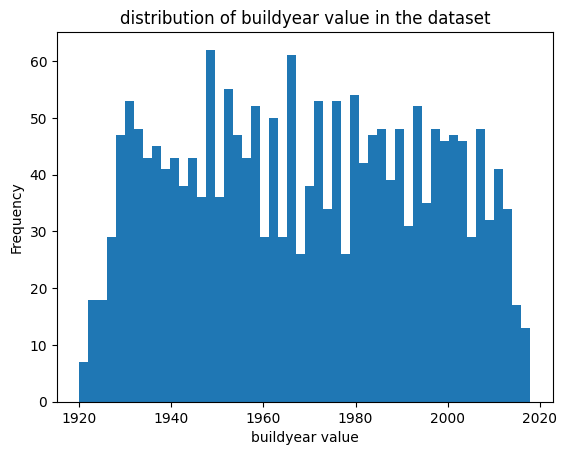

In [18]:
plot_histogram("buildyear", 50)

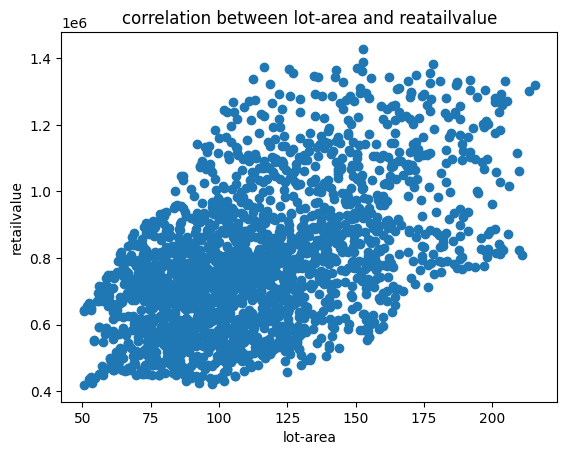

In [19]:
x_value = df["lot-area"]
y_value = df["retailvalue"]

plt.scatter(x_value, y_value)

plt.xlabel('lot-area')
plt.ylabel('retailvalue')
plt.title('correlation between lot-area and reatailvalue')
plt.show()


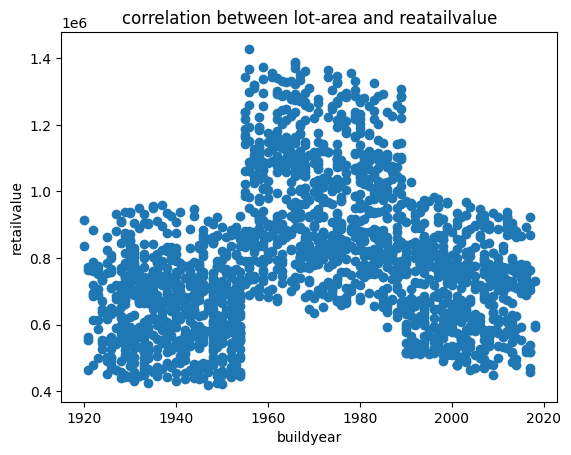

In [20]:
x_value = df["buildyear"]
y_value = df["retailvalue"]

plt.scatter(x_value, y_value)

plt.xlabel('buildyear')
plt.ylabel('retailvalue')
plt.title('correlation between lot-area and reatailvalue')
plt.show()

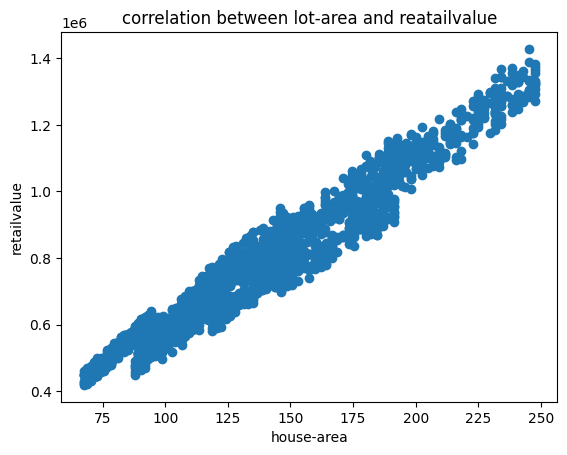

In [21]:
x_value = df["house-area"]
y_value = df["retailvalue"]

plt.scatter(x_value, y_value)

plt.xlabel('house-area')
plt.ylabel('retailvalue')
plt.title('correlation between lot-area and reatailvalue')
plt.show()

### ML - Linear regression

In [24]:
X = df[["house-area"]]
y = df["retailvalue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [25]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

2476591712.273579


Be more smart

<Axes: >

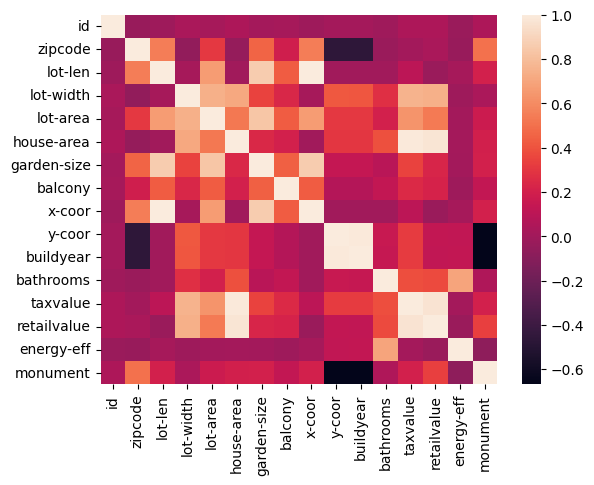

In [26]:
data_correlation = df.corr()

sns.heatmap(data_correlation)

In [28]:
X = df.drop("retailvalue", axis=1)
y = df["retailvalue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

422185690.636318
17063.867363066096
